<a href="https://colab.research.google.com/github/aviaga/FutureMakers/blob/main/Day%2018%20(7-23)%20-%20Project%20(Supplemental)%20on%20Creating%20a%20Model%20for%20House%20Prices%20(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction
This is the implementation of the supplimental activity of Day 18's Action Item for SureStart's summer program, 2021. The modified line of code is under Model 1; no other sections have been changed from earlier. 

The tutorial for this model development activity can be found [ here](https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4)



# Model 1

 **Data Preprocessing Steps**

In [23]:
#Importing necessary libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [24]:
#Importing dataset 
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata (1).csv


In [25]:
#Importing dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

In [26]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [27]:
#Converting data to array format
dataset = df.values

In [28]:
#Assigning first 10 columns of data in array to x
X = dataset[:,0:10]

In [29]:
#Assigning last column of data in array to y
Y = dataset[:,10]

In [30]:
#Scaling data for normalization
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [31]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [32]:
#Splitting dataset into train, test, and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [33]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


**Building and Training the Model**

In [34]:
#Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense

In [35]:
#Defining model architecture/structure
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [36]:
# Model configuration
# CHANGED LOSS TO MEAN SQUARED ERROR
model.compile(optimizer='sgd',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [37]:
#Training model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.2483 - accuracy: 0.5041 - val_loss: 0.2463 - val_accuracy: 0.5388
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.4879 - val_loss: 0.2455 - val_accuracy: 0.5479
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.4964 - val_loss: 0.2446 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.5114 - val_loss: 0.2438 - val_accuracy: 0.5662
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.5105 - val_loss: 0.2430 - val_accuracy: 0.5662
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.5345 - val_loss: 0.2423 - val_accuracy: 0.5845
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.5327 - val_loss: 0.2416 - val_accuracy: 0.5890
Epoch 8/100


In [38]:
#Evaluating model on test dataset
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9178


0.9178082346916199

**Visualizing Loss & Accuracy**

In [39]:
#Import library
import matplotlib.pyplot as plt

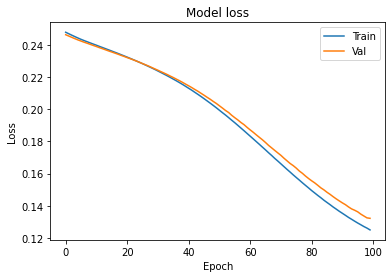

In [40]:
#Visualizing the loss of the model on the training and validation dataset
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

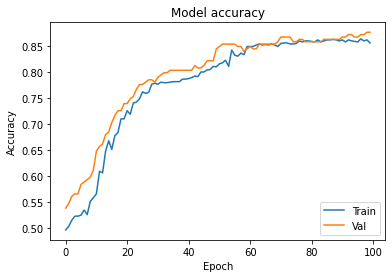

In [41]:
#Visualizing the accuracy of the model on the training and validation dataset
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Showcasing the Need for Regularization - Making Another Model

In [42]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [43]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5753 - accuracy: 0.6966 - val_loss: 0.4894 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3814 - accuracy: 0.8317 - val_loss: 0.3639 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3120 - accuracy: 0.8604 - val_loss: 0.4030 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2721 - accuracy: 0.8795 - val_loss: 0.3567 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2512 - accuracy: 0.8856 - val_loss: 0.3893 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2569 - accuracy: 0.8868 - val_loss: 0.3105 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2515 - accuracy: 0.8997 - val_loss: 0.3327 - val_accuracy: 0.8630
Epoch 

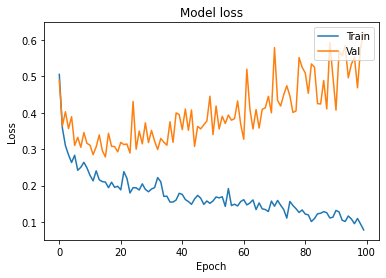

In [45]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

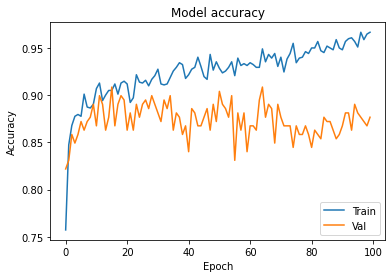

In [46]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Additional Model to Reduce the Over-Fitting in Model 2

In [47]:
from keras.layers import Dropout
from keras import regularizers

In [48]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [49]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 63ms/step - loss: 21.1147 - accuracy: 0.5934 - val_loss: 3.9122 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4752 - accuracy: 0.8434 - val_loss: 0.7159 - val_accuracy: 0.8128
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.6368 - accuracy: 0.8316 - val_loss: 0.5413 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 2s 47ms/step - loss: 0.5648 - accuracy: 0.8349 - val_loss: 0.5129 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5025 - accuracy: 0.8691 - val_loss: 0.5083 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5187 - accuracy: 0.8577 - val_loss: 0.5041 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4828 - accuracy: 0.8731 - val_loss: 0.5131 - val_accuracy: 0.8539
Epoch

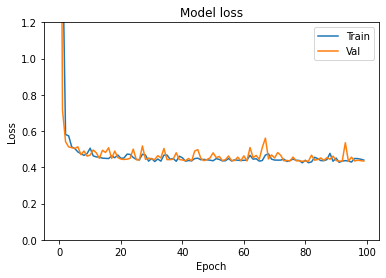

In [51]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

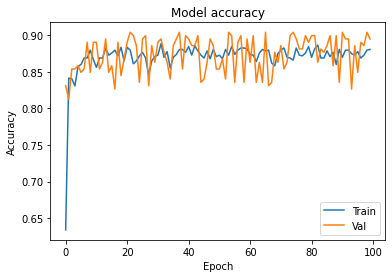

In [52]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()